## Predicting Customer Purchase of Term Deposits

---

In [57]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
bank_clean2 = pd.read_csv('./Bank Marketing_Model Training Data.csv')

### 1. Feature Engineering

In [59]:
contact_encoded = pd.get_dummies(bank_clean2['contact'], prefix = 'contact')
contact_encoded.sample(n = 5, random_state = 1)

,contact_cellular,contact_telephone
33195,True,False
29780,False,True
23803,True,False
33600,True,False
2136,False,True


In [60]:
job_encoded = pd.get_dummies(bank_clean2['job'], prefix = 'job')
job_encoded.sample(n = 5, random_state = 1)

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
33195,False,False,False,False,False,False,False,False,False,True,False
29780,True,False,False,False,False,False,False,False,False,False,False
23803,False,False,False,False,False,False,False,True,False,False,False
33600,True,False,False,False,False,False,False,False,False,False,False
2136,False,True,False,False,False,False,False,False,False,False,False


In [61]:
poutcome_encoded = pd.get_dummies(bank_clean2['poutcome'], prefix = 'poutcome')
poutcome_encoded.sample(n = 5, random_state = 1)

,poutcome_failure,poutcome_nonexistent,poutcome_success
33195,False,True,False
29780,False,True,False
23803,False,True,False
33600,False,True,False
2136,False,True,False


The categorical columns contact, job, and poutcome are nominal categories and one-hot encoded to prepare them for modelling.

In [62]:
bank_model = pd.concat([bank_clean2, contact_encoded, job_encoded, poutcome_encoded], axis=1)
bank_model.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'contact_cellular', 'contact_telephone',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

After one-hot encoding, the columns were joined to the main bank dataset.

In [63]:
bank_model2 = bank_clean2.copy()

In [64]:
bank_model2['contact'] = bank_clean2['contact'].map({'cellular' : 1, 'telephone' : 2})
bank_model2['contact'].value_counts()

contact
1    24441
2    13804
Name: count, dtype: int64

In [65]:
bank_model2['job'] = bank_clean2['job'].map({'technician' : 1, 'unemployed' : 2, 'admin.' : 3, 'blue-collar' : 4, 'entrepreneur' : 5, 'housemaid' : 6, 
                                            'management' : 7, 'retired' : 8, 'self-employed' : 9, 'services' : 10, 'student' : 11})
bank_model2['job'].value_counts()

job
3     9937
4     8560
1     6380
10    3716
7     2728
8     1577
5     1360
9     1349
6      987
2      963
11     688
Name: count, dtype: int64

In [66]:
bank_model2['poutcome'] = bank_clean2['poutcome'].map({'failure' : 1, 'success' : 2, 'nonexistent' : 3})
bank_model2['poutcome'].value_counts()

poutcome
3    33066
1     3936
2     1243
Name: count, dtype: int64

In [67]:
bank_model['month'] = bank_clean2['month'].map({'mar' : 3, 'apr' : 4, 'may' : 5, 'jun' : 6, 'jul' : 7, 'aug' : 8, 'sep' : 9, 'oct' : 10, 'nov' : 11, 'dec' : 12})
bank_model2['month'] = bank_clean2['month'].map({'mar' : 3, 'apr' : 4, 'may' : 5, 'jun' : 6, 'jul' : 7, 'aug' : 8, 'sep' : 9, 'oct' : 10, 'nov' : 11, 'dec' : 12})
bank_model['month'].value_counts()

month
5     12794
7      6630
8      5822
6      4846
11     3898
4      2436
10      659
9       502
3       497
12      161
Name: count, dtype: int64

In [68]:
bank_model['education'] = bank_clean2['education'].map({'illiterate' : 1, 'basic.4y' : 2, 'basic.6y' : 3, 'basic.9y' : 4, 'high.school' : 5, 'professional.course' : 6, 'university.degree' : 7})
bank_model2['education'] = bank_clean2['education'].map({'illiterate' : 1, 'basic.4y' : 2, 'basic.6y' : 3, 'basic.9y' : 4, 'high.school' : 5, 'professional.course' : 6, 'university.degree' : 7})
bank_model['education'].value_counts()

education
7    11821
5     9244
4     5856
6     5100
2     4002
3     2204
1       18
Name: count, dtype: int64

The categorical columns education and month are ordinal categories and ordinal encoded by mapping them to unique integers based on their order.

In [69]:
bank_model.sample(n = 5, random_state = 1)

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,poutcome_failure,poutcome_nonexistent,poutcome_success
33195,33,technician,divorced,6,False,False,cellular,5,mon,1,...,False,False,False,False,False,True,False,False,True,False
29780,39,admin.,married,3,True,False,telephone,5,thu,3,...,False,False,False,False,False,False,False,False,True,False
23803,30,services,married,6,False,False,cellular,11,wed,1,...,False,False,False,True,False,False,False,False,True,False
33600,25,admin.,single,7,True,True,cellular,5,tue,2,...,False,False,False,False,False,False,False,False,True,False
2136,36,blue-collar,married,4,False,True,telephone,5,tue,1,...,False,False,False,False,False,False,False,False,True,False


In [70]:
# categorical variables were ordinal encoded instead of one-hot encoded for the decision tree classifier
X2 = bank_model2.drop(['housing', 'loan', 'marital', 'day_of_week', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'y'], axis = 1)
X2

,age,job,education,contact,month,campaign,pdays,previous,poutcome,emp.var.rate,nr.employed
0,56,6,2,2,5,1,999,0,3,1.1,5191.0
1,57,10,5,2,5,1,999,0,3,1.1,5191.0
2,37,10,5,2,5,1,999,0,3,1.1,5191.0
3,40,3,3,2,5,1,999,0,3,1.1,5191.0
4,56,10,5,2,5,1,999,0,3,1.1,5191.0
...,...,...,...,...,...,...,...,...,...,...,...
38240,73,8,6,1,11,1,999,0,3,-1.1,4963.6
38241,46,4,6,1,11,1,999,0,3,-1.1,4963.6
38242,56,8,7,1,11,2,999,0,3,-1.1,4963.6
38243,44,1,6,1,11,1,999,0,3,-1.1,4963.6


In [71]:
X = bank_model.drop(['job', 'contact', 'poutcome', 'housing', 'loan', 'marital', 'day_of_week', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'job_admin.', 'contact_cellular', 'poutcome_nonexistent', 'y'], axis = 1)
X

,age,education,month,campaign,pdays,previous,emp.var.rate,nr.employed,contact_telephone,job_blue-collar,...,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,poutcome_failure,poutcome_success
0,56,2,5,1,999,0,1.1,5191.0,True,False,...,True,False,False,False,False,False,False,False,False,False
1,57,5,5,1,999,0,1.1,5191.0,True,False,...,False,False,False,False,True,False,False,False,False,False
2,37,5,5,1,999,0,1.1,5191.0,True,False,...,False,False,False,False,True,False,False,False,False,False
3,40,3,5,1,999,0,1.1,5191.0,True,False,...,False,False,False,False,False,False,False,False,False,False
4,56,5,5,1,999,0,1.1,5191.0,True,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38240,73,6,11,1,999,0,-1.1,4963.6,False,False,...,False,False,True,False,False,False,False,False,False,False
38241,46,6,11,1,999,0,-1.1,4963.6,False,True,...,False,False,False,False,False,False,False,False,False,False
38242,56,7,11,2,999,0,-1.1,4963.6,False,False,...,False,False,True,False,False,False,False,False,False,False
38243,44,6,11,1,999,0,-1.1,4963.6,False,False,...,False,False,False,False,False,False,True,False,False,False


The X variable was assigned with the columns that are going to be used as input variables for predictive modelling. <br>

Any unnecessary columns were dropped, including the reference columns, job_admin., contact_cellular, and poutcome-nonexistent, for each categorical feature that was one-hot encoded.

In [72]:
y = bank_model['y']
y

0        False
1        False
2        False
3        False
4        False
         ...  
38240     True
38241    False
38242    False
38243     True
38244    False
Name: y, Length: 38245, dtype: bool

The Y variable was assigned with the column y, which is the output variable our model will be predicting. 

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 99, stratify = y) 

Created the necessary `X_train`, `X_test`, `y_train` and `y_test` variables using the chosen features.

In [75]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

The bank dataset is first split into training and testing datasets in a 3:1 ratio and stratified to make sure they have the same proportion of classes (true or false) as the original dataset. <br>

The X_train and X_test datasets were standardized across all features by removing the mean and scaling to unit variance.

### 2. Training of KNN classifier

In [76]:
# Calculate training and testing errors for K=1 through 100
k_range = list(range(1, 101))
training_error_a = []
testing_error_a = []
training_error_p = []
testing_error_p = []
training_error_r = []
testing_error_r = []

for k in k_range:
    # Instantiate the model with the current K value 
    knn = KNeighborsClassifier(n_neighbors = k, n_jobs = -1)
    knn.fit(X_train, y_train)
    
    # Calculate training error
    y_prediction = knn.predict(X_train)
    training_accuracy = metrics.accuracy_score(y_train, y_prediction)
    training_precision = metrics.precision_score(y_train, y_prediction)
    training_recall = metrics.recall_score(y_train, y_prediction)
    training_error_a.append(1 - training_accuracy) 
    training_error_p.append(1 - training_precision)
    training_error_r.append(1 - training_recall)
    
    # Calculate testing error
    y_prediction = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_prediction)
    testing_precision = metrics.precision_score(y_test, y_prediction)
    testing_recall = metrics.recall_score(y_test, y_prediction)
    testing_error_a.append(1 - testing_accuracy)
    testing_error_p.append(1 - testing_precision)
    testing_error_r.append(1 - testing_recall)

A loop was applied to find the optimal K value for our KNN classifier.

In [77]:
# Plot the relationship between K and both training and testing errors for 3 different metrics.
fig6 = make_subplots(rows=1, cols=3, shared_xaxes = True, subplot_titles=('Accuracy', 'Precision', 'Recall'), horizontal_spacing = 0.03)

fig6.add_trace(go.Scatter(x = k_range, y = testing_error_a, mode = 'lines', hovertemplate = 'No. of K: %{x}<br>testing_error_a: %{y:.3f} <extra></extra>', line = dict(color = 'blue'), showlegend = False), row = 1, col = 1)
fig6.add_trace(go.Scatter(x = k_range, y = training_error_a, mode = 'lines', hovertemplate = 'No. of K: %{x}<br>training_error_a: %{y:.3f} <extra></extra>', line = dict(color = 'red'), showlegend = False), row = 1, col = 1)
fig6.add_trace(go.Scatter(x = k_range, y = testing_error_p, mode = 'lines', hovertemplate = 'No. of K: %{x}<br>testing_error_p: %{y:.3f} <extra></extra>',  line = dict(color = 'blue'), name = 'Testing Error'), row = 1, col = 2)
fig6.add_trace(go.Scatter(x = k_range, y = training_error_p, mode = 'lines', hovertemplate = 'No. of K: %{x}<br>training_error_p: %{y:.3f} <extra></extra>', line = dict(color = 'red'), name = 'Training Error'), row = 1, col = 2)
fig6.add_trace(go.Scatter(x = k_range, y = testing_error_r, mode = 'lines', hovertemplate = 'No. of K: %{x}<br>testing_error_r: %{y:.3f} <extra></extra>', line = dict(color = 'blue'), showlegend = False), row = 1, col = 3)
fig6.add_trace(go.Scatter(x = k_range, y = training_error_r, mode = 'lines', hovertemplate = 'No. of K: %{x}<br>training_error_r: %{y:.3f} <extra></extra>', line = dict(color = 'red'), showlegend = False), row = 1, col = 3)

fig6.add_annotation(text = 'Testing / Training Errors', xref = 'paper', yref = 'paper', x = -0.045, y = 0.5, showarrow = False, textangle = -90, font = dict(size = 20))  
fig6.add_annotation(text = 'No. of K for KNN', xref = 'paper', yref = 'paper', x = 0.5, y = -0.2, showarrow = False, font = dict(size = 20))  
fig6.update_layout(title = {'text' : 'Testing VS Training Errors for Different Success Metrics', 'y' : 0.97, 'x' : 0.5, 'xanchor' : 'center', 'yanchor' : 'top', 'font' : {'size' : 24}},
                   margin = dict(l = 80, r = 40, t = 80, b = 70), hovermode = "x", legend = dict(x = 0.47, y = 0.25, xanchor = 'left', yanchor = 'top', bgcolor = 'rgba(255, 255, 255, 0.5)'))
fig6.show()

In [78]:
# Create a dataframe of all testing error data from the accuracy, precision, and recall metrics for K values 1 through 100.
testing_error_data = pd.DataFrame({'K' : k_range, 'testing_error_a' : testing_error_a, 'testing_error_p' : testing_error_p, 'testing_error_r' : testing_error_r}).set_index('K').round(3)
testing_error_data.sort_values(['testing_error_p', 'testing_error_a', 'testing_error_r']).head(10)

,testing_error_a,testing_error_p,testing_error_r
K,,,
32,0.101,0.369,0.783
56,0.102,0.374,0.792
70,0.102,0.374,0.799
54,0.102,0.375,0.792
58,0.102,0.375,0.793
81,0.102,0.376,0.797
78,0.103,0.376,0.801
80,0.103,0.376,0.801
30,0.102,0.377,0.783


By comparing the training and testing errors for the accuracy, precision and recall metrics, a K value of 32 was determined to be optimal because it achieved the lowest testing errors for both accuracy and precision.

### 3. Evaluation of KNN Classifier

In [79]:
knn = KNeighborsClassifier(n_neighbors = 32)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=32)

In [80]:
# Calculate predictions using the KNN classifier model and generate a classification report using precision, recall, f1-score metrics to evaluate the model performance
y_prediction = knn.predict(X_test)
report = metrics.classification_report(y_test, y_prediction, output_dict = True)

# Add micro-averaged metrics
report['micro avg'] = {'precision': metrics.precision_score(y_test, y_prediction, average='micro'),'recall': metrics.recall_score(y_test, y_prediction, average='micro'),
                       'f1-score': metrics.f1_score(y_test, y_prediction, average='micro'),'support': len(y_test)}

# Modify the report to be easier to comprehend
report_df = pd.DataFrame(report).round(3)
report_df = report_df.drop(['False', 'accuracy'], axis = 1)
report_df = report_df.drop('support')
report_df.loc['accuracy'] = [round((metrics.accuracy_score(y_test, y_prediction)), 3), 'N/A', 'N/A', 'N/A']
report_df = report_df.rename(columns = {'True' : 'binary'})
report_df

,binary,macro avg,weighted avg,micro avg
precision,0.631,0.77,0.878,0.899
recall,0.217,0.601,0.899,0.899
f1-score,0.323,0.634,0.876,0.899
accuracy,0.899,N/A,N/A,N/A


1) After the KNN classifier was trained with our training data at K = 32, I evaluated its performance using a combination of different metrics: Precision, accuracy, f1-score, and accuracy. <br>
2) Under the binary column, the metrics are focusing on the positive class only. In this case, customers who decide to purchase. Accuracy is high at 0.899, However, recall is quite low at 0.217. <br>
3) Under the macro avg column, metrics are calculated for each class, and returns their unweighted mean. This does not take into account class imbalance. <br>
4) For both weighted and micro avg, metrics are calculated for each class, and returns their weighted mean to account for class imbalance. <br>
5) Due to the huge imbalance in negative and postive classes in this dataset, the weighted and micro avg metrics display a significantly different result than the binary column.

In [81]:
majority_class = y_train.value_counts().index[0]

print(y_train.value_counts())
majority_class

y
False    25490
True      3193
Name: count, dtype: int64


False

In [82]:
print(f'Null Accuracy = {round(y_test.value_counts()[majority_class] / y_test.count(), 3)}')

Null Accuracy = 0.889


The model accuracy of 0.899 is very similar to the null accuracy of 0.889, computed from the majority class. However, this is due to the significant class imbalance in this dataset, with 'non-buyers' heavily outweighing 'buyers. <br>

Therefore, for a more accurate evaluation of model performance, the precision and recall metrics should be further investigated.

#### 3.1. Inspection of confusion matrix

In [83]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

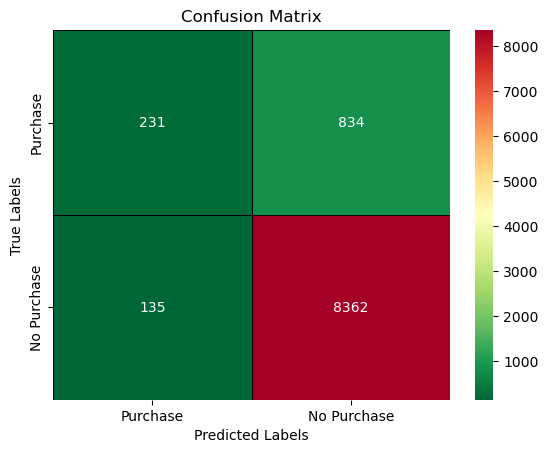

In [84]:
# Plot the confusion matrix using data from y_test and y_prediction
cm_bank_model = confusion_matrix(y_test, y_prediction)

class_names = ['No Purchase','Purchase']
sns.heatmap(cm_bank_model, annot = True, fmt='d', cmap = 'RdYlGn_r', xticklabels = class_names, yticklabels = class_names, linewidths = 0.5, linecolor = 'black')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

1) The number of true negatives (TN) is 8362, significantly outweighing any other component on the matrix and is the reason for high values of Accuracy for both model and null. Accuracy = (TP + TN) / (TN + TP + FP + FN). <br>
2) However, Recall (= TP / ( TP + FN)), is the most important metric for our use case because it represents the revenue a bank is able to make from potential customers. The higher the recall, the more effective the model is in predicting customers who will purchase the bank's product. <br>
3) Precision (= TP / ( TP + FP)) is not as important a metric as Recall because a low Precision does not incur much cost to the company, it is simply wasted phone calls to customers who are not likely to buy the bank's product.

#### 3.2. Investigate relationship between column features and prediction accuracy 

In [85]:
y_prediction = pd.Series((y_prediction), index = y_test.index)
bank_model_predictions = bank_clean2.copy()
bank_model_predictions['y_test'] = y_test
bank_model_predictions['y_prediction'] = y_prediction
bank_model_predictions = bank_model_predictions.dropna(subset = ['y_test'])
bank_model_predictions['correct_prediction'] = bank_model_predictions.apply(lambda row: True if row['y_test'] == row['y_prediction'] else False, axis = 1)

Created a new column for correct predictions which returns for each customer True if the predicted outcome was accurate and False otherwise.

In [86]:
accuracy_job = round((bank_model_predictions.groupby('job')['correct_prediction'].mean().sort_values(ascending = False)) * 100, 1)
accuracy_education = round((bank_model_predictions.groupby('education')['correct_prediction'].mean().sort_values(ascending = False)) * 100, 1)
accuracy_marital = round((bank_model_predictions.groupby('marital')['correct_prediction'].mean().sort_values(ascending = False)) * 100, 1)
accuracy_month = round((bank_model_predictions.groupby('month')['correct_prediction'].mean().sort_values(ascending = False)) * 100, 1)
accuracy_day = round((bank_model_predictions.groupby('day_of_week')['correct_prediction'].mean().sort_values(ascending = False)) * 100, 1)
accuracy_housing = round((bank_model_predictions.groupby('housing')['correct_prediction'].mean().sort_values(ascending = False)) * 100, 1)
accuracy_loan = round((bank_model_predictions.groupby('loan')['correct_prediction'].mean().sort_values(ascending = False)) * 100, 1)
accuracy_contact = round((bank_model_predictions.groupby('contact')['correct_prediction'].mean().sort_values(ascending = False)) * 100, 1)
accuracy_poutcome = round((bank_model_predictions.groupby('poutcome')['correct_prediction'].mean().sort_values(ascending = False)) * 100, 1)

Calculated the prediction accuracies for different categorical variables.

In [87]:
# Create subplots of bar charts for each categorical feature and combine them in a single plot to investigate prediction accuracy
fig7 = make_subplots(rows=3, cols=6, specs=[[None, {}, {}, {}, {'colspan': 2}, None], 
                                            [{'colspan': 3}, None, None, {'colspan': 3}, None, None], 
                                            [{'colspan': 3}, None, None, {'colspan': 2}, None, {}]], 
                     subplot_titles=('Housing Loan', 'Personal Loan', 'Contact Method', 'Marital Status', 
                                     'Job', 'Education Level', 'Last Contact Month', 'Last Contact Day', 'Previous Campaign Outcome'), vertical_spacing = 0.11, horizontal_spacing = 0.03)

fig7.add_trace(go.Bar(x = accuracy_housing.index, y = accuracy_housing, hovertemplate = 'housing: %{x}<br>accuracy: %{y} %<extra></extra>'), row = 1, col = 2)
fig7.add_trace(go.Bar(x = accuracy_loan.index, y = accuracy_loan, hovertemplate = 'loan: %{x}<br>accuracy: %{y} %<extra></extra>'), row = 1, col = 3)
fig7.add_trace(go.Bar(x = accuracy_contact.index, y = accuracy_contact, hovertemplate = 'contact: %{x}<br>accuracy: %{y} %<extra></extra>'), row = 1, col = 4)
fig7.add_trace(go.Bar(x = accuracy_marital.index, y = accuracy_marital, hovertemplate = 'marital: %{x}<br>accuracy: %{y} %<extra></extra>'), row = 1, col = 5)
fig7.add_trace(go.Bar(x = accuracy_job.index, y = accuracy_job, hovertemplate = 'job: %{x}<br>accuracy: %{y} %<extra></extra>'), row = 2, col = 1)
fig7.add_trace(go.Bar(x = accuracy_education.index, y = accuracy_education, hovertemplate = 'education: %{x}<br>accuracy: %{y} %<extra></extra>'), row = 2, col = 4)
fig7.add_trace(go.Bar(x = accuracy_month.index, y = accuracy_month, hovertemplate = 'month: %{x}<br>accuracy: %{y} %<extra></extra>'), row = 3, col = 1)
fig7.add_trace(go.Bar(x = accuracy_day.index, y = accuracy_day, hovertemplate = 'day: %{x}<br>accuracy: %{y} %<extra></extra>'), row = 3, col = 4)
fig7.add_trace(go.Bar(x = accuracy_poutcome.index, y = accuracy_poutcome, hovertemplate = 'poutcome: %{x}<br>accuracy: %{y} %<extra></extra>'), row = 3, col = 6)

fig7.update_xaxes(tickangle = 15, row = 2, col = 4)
fig7.update_xaxes(tickangle = 25, row = 2, col = 1) 
fig7.add_annotation(text = 'Prediction Accuracy (%)', xref = 'paper', yref = 'paper', x = -0.045, y = 0.5, showarrow = False, textangle = -90, font = dict(size = 20))  
fig7.update_layout(title={'text' : 'Prediction Accuracy for Different Categorical Variables', 'y' : 0.97, 'x' : 0.5, 'xanchor' : 'center', 'yanchor' : 'top', 'font' : {'size' : 24}},
                   margin = dict(l = 80, r = 40, t = 80, b = 50), showlegend = False, height = 800)
fig7.show()

<u><h5> Analysis of Prediction Model</h5></u>
1) Looking at the trend in prediction accuracies across categorical variables such as month, job, education level, and previous campaign outcome, an inverse correlation can be observed between prediction accuracy and customer purchase rates (Fig5). The higher the prediction accuracy, the lower the customer purchase rates. <br>
2) For the month variable, the least accurate predictions, ranging from 58 to 69%, were from the months of sep, dec, mar, and oct. In contrast, these months had the highest customer purchase rates ranging from 45 to 51% in Figure 5. <br>
3) Similarly, for the job variable, the least accurate predictions came from students and retired customers at 74.2 and 77.6%, respectively. In contrast, retired customers and students had the highest customer purchase rates of 25 and 30%, respectively. <br>
4) For the poutcome variable, the least accurate prediction came from customers with successful previous campaign outcomes at 64.8%. In contrast, customers with successful previous campaign outcomes had the highest customer purchase rates of 64.6%.

In [88]:
accuracy_age = round((bank_model_predictions.groupby('age')['correct_prediction'].mean()) * 100, 1)
accuracy_campaign = round((bank_model_predictions.groupby('campaign')['correct_prediction'].mean()) * 100, 1)
accuracy_pdays = round((bank_model_predictions.groupby('pdays')['correct_prediction'].mean()) * 100, 1)
accuracy_previous = round((bank_model_predictions.groupby('previous')['correct_prediction'].mean()) * 100, 1)
accuracy_empvarrate = round((bank_model_predictions.groupby('emp.var.rate')['correct_prediction'].mean()) * 100, 1)
accuracy_conspriceidx = round((bank_model_predictions.groupby('cons.price.idx')['correct_prediction'].mean()) * 100, 1)
accuracy_consconfidx = round((bank_model_predictions.groupby('cons.conf.idx')['correct_prediction'].mean()) * 100, 1)
accuracy_euribor3m = round((bank_model_predictions.groupby('euribor3m')['correct_prediction'].mean()) * 100, 1)
accuracy_nremployed = round((bank_model_predictions.groupby('nr.employed')['correct_prediction'].mean()) * 100, 1)

Calculated the prediction accuracies for different numerical variables.

In [89]:
# Create subplots of bar charts for each numerical feature and combine them in a single plot to investigate prediction accuracy
fig8 = make_subplots(rows = 3, cols = 3, subplot_titles=('No. of Contacts in Current Campaign', 'Days After Last Contact', 'No. of Contacts in Previous Campaign', 'Customer Age (y/o)', 'Employment Variation Rate (%)', 
                                                        'Consumer Price Index (%)', 'Consumer Confidence Index', 'Loan Interest Rate (%)', 'Total Employed (Thousands)'), vertical_spacing = 0.08, horizontal_spacing = 0.03)

fig8.add_trace(go.Bar(x = accuracy_campaign.index, y = accuracy_campaign, hovertemplate = 'campaign: %{x} contacts<br>accuracy: %{y} %<extra></extra>'), row = 1, col = 1)
fig8.add_trace(go.Bar(x = accuracy_pdays.index, y = accuracy_pdays, hovertemplate = 'pdays: %{x} days<br>accuracy: %{y} %<extra></extra>'), row = 1, col = 2)
fig8.add_trace(go.Bar(x = accuracy_previous.index, y = accuracy_previous, hovertemplate = 'previous: %{x} contacts<br>accuracy: %{y} %<extra></extra>'), row = 1, col = 3)
fig8.add_trace(go.Bar(x = accuracy_age.index, y = accuracy_age, hovertemplate = 'age: %{x} y/o<br>accuracy: %{y} %<extra></extra>'), row = 2, col = 1)
fig8.add_trace(go.Bar(x = accuracy_empvarrate.index, y = accuracy_empvarrate, hovertemplate = 'emp.var.rate: %{x} %<br>accuracy: %{y} %<extra></extra>'), row = 2, col = 2)
fig8.add_trace(go.Bar(x = accuracy_conspriceidx.index, y = accuracy_conspriceidx, hovertemplate = 'cons.price.idx: %{x} %<br>accuracy: %{y} %<extra></extra>', width = 0.03), row = 2, col = 3)
fig8.add_trace(go.Bar(x = accuracy_consconfidx.index, y = accuracy_consconfidx, hovertemplate = 'cons.conf.idx: %{x} <br>accuracy: %{y} %<extra></extra>', width = 0.3), row = 3, col = 1)
fig8.add_trace(go.Bar(x = accuracy_euribor3m.index, y = accuracy_euribor3m, hovertemplate = 'euribor3m: %{x} %<br>accuracy: %{y} %<extra></extra>', width = 0.02), row = 3, col = 2)
fig8.add_trace(go.Bar(x = accuracy_nremployed.index, y = accuracy_nremployed, hovertemplate = 'nremployed: %{x} k<br>accuracy: %{y} %<extra></extra>'), row = 3, col = 3)
   
fig8.add_annotation(text = 'Prediction Accuracy (%)', xref = 'paper', yref = 'paper', x = -0.047, y = 0.5, showarrow = False, textangle = -90, font = dict(size = 20))  
fig8.update_layout(title = {'text' : 'Prediction Accuracy for Different Numerical Variables', 'y' : 0.97, 'x' : 0.5, 'xanchor' : 'center', 'yanchor' : 'top', 'font' : {'size' : 24}}, 
                   margin = dict(l = 80, r = 40, t = 80, b = 50), showlegend = False, height = 800)
fig8.show()

<u><h5> Analysis of Prediction Model</h5></u>

1) Looking at the trend in prediction accuracies across numerical variables such as age, no. of contacts in current campaign, total employed and employment variation rate, an inverse correlation can be observed between prediction accuracy and customer purchase rates (Fig4). The higher the prediction accuracy, the lower the customer purchase rates. <br>
2) For the age variable, the least accurate predictions, ranging from 40 to 80%, came from customers aged 62 to 80 y/o. In contrast, customers in this age bracket had the highest customer purchase rates ranging from 31 to 67% in Figure 4. <br>
3) Similarly, for the nremployed variable, the least accurate predictions of between 61 to 65% came when total employment was between 4.9k to 5k. In contrast, at these same employment numbers customer purchase rates were the highest of between 43 to 57%. <br>
4) The inverse correlation between purchase rates and model prediction accuracy point to a consistent fact that the high accuracy stems from prediction of negative outcomes which are customers who are not buyers. However, we need a model to predict positive outcomes, customer who are potential buyers.

### 4. Training of KNN Classifier using Oversampling Technique

In [90]:
from imblearn.over_sampling import ADASYN

In [91]:
# Use an oevrsampling technique, adasyn, to reduce class imbalance
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, random_state = 99, stratify = y) 

ada = ADASYN(random_state = 99)
X_train2_resampled, y_train2_resampled = ada.fit_resample(X_train2, y_train2)

print(y_train2.value_counts())
print(y_train2_resampled.value_counts())

y
False    25490
True      3193
Name: count, dtype: int64
y
True     25630
False    25490
Name: count, dtype: int64


To address the issue of class imbalance in predictive modelling, an oversampling techiniques called ADASYN (Adaptive Synthetic Sampling) was applied to the training datasets. <br>

ADASYN generates synthetic data points in regions where the minority class is harder to learn, adapting its sampling strategy based on density distribution. 

In [92]:
X_train2_resampled = scaler.fit_transform(X_train2_resampled) 
X_test2 = scaler.transform(X_test2)

In [93]:
# Calculate training and testing errors for K=1 through 100
k_range = list(range(1, 101))
training_error_a2 = []
testing_error_a2 = []
training_error_p2 = []
testing_error_p2 = []
training_error_r2 = []
testing_error_r2 = []

# Instantiate the model with the current K value
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train2_resampled, y_train2_resampled)
    
    # Calculate training error
    y_prediction2 = knn.predict(X_train2_resampled)
    training_accuracy2 = metrics.accuracy_score(y_train2_resampled, y_prediction2)
    training_precision2 = metrics.precision_score(y_train2_resampled, y_prediction2)
    training_recall2 = metrics.recall_score(y_train2_resampled, y_prediction2)
    training_error_a2.append(1 - training_accuracy2) 
    training_error_p2.append(1 - training_precision2)
    training_error_r2.append(1 - training_recall2)
    
    # Calculate testing error
    y_prediction2 = knn.predict(X_test2)
    testing_accuracy2 = metrics.accuracy_score(y_test2, y_prediction2)
    testing_precision2 = metrics.precision_score(y_test2, y_prediction2)
    testing_recall2 = metrics.recall_score(y_test2, y_prediction2)
    testing_error_a2.append(1 - testing_accuracy2)
    testing_error_p2.append(1 - testing_precision2)
    testing_error_r2.append(1 - testing_recall2)

A loop was applied to find the optimal K value for the KNN classifier.

In [94]:
# Plot the relationship between K and both training and testing errors for 3 different metrics.
fig9 = make_subplots(rows=1, cols=3, shared_xaxes = True, subplot_titles=('Accuracy', 'Precision', 'Recall'), horizontal_spacing = 0.03)

fig9.add_trace(go.Scatter(x = k_range, y = testing_error_a2, mode = 'lines', hovertemplate = 'No. of K: %{x}<br>testing_error_a2: %{y:.3f} <extra></extra>', line = dict(color = 'blue'), showlegend = False), row = 1, col = 1)
fig9.add_trace(go.Scatter(x = k_range, y = training_error_a2, mode = 'lines', hovertemplate = 'No. of K: %{x}<br>training_error_a2: %{y:.3f} <extra></extra>', line = dict(color = 'red'), showlegend = False), row = 1, col = 1)
fig9.add_trace(go.Scatter(x = k_range, y = testing_error_p2, mode = 'lines', hovertemplate = 'No. of K: %{x}<br>testing_error_p2: %{y:.3f} <extra></extra>',  line = dict(color = 'blue'), name = 'Testing Error'), row = 1, col = 2)
fig9.add_trace(go.Scatter(x = k_range, y = training_error_p2, mode = 'lines', hovertemplate = 'No. of K: %{x}<br>training_error_p2: %{y:.3f} <extra></extra>', line = dict(color = 'red'), name = 'Training Error'), row = 1, col = 2)
fig9.add_trace(go.Scatter(x = k_range, y = testing_error_r2, mode = 'lines', hovertemplate = 'No. of K: %{x}<br>testing_error_r2: %{y:.3f} <extra></extra>', line = dict(color = 'blue'), showlegend = False), row = 1, col = 3)
fig9.add_trace(go.Scatter(x = k_range, y = training_error_r2, mode = 'lines', hovertemplate = 'No. of K: %{x}<br>training_error_r2: %{y:.3f} <extra></extra>', line = dict(color = 'red'), showlegend = False), row = 1, col = 3)

fig9.add_annotation(text = 'Testing / Training Errors', xref = 'paper', yref = 'paper', x = -0.045, y = 0.5, showarrow = False, textangle = -90, font = dict(size = 20))  
fig9.add_annotation(text = 'No. of K for KNN', xref = 'paper', yref = 'paper', x = 0.5, y = -0.2, showarrow = False, font = dict(size = 20))  
fig9.update_layout(title = {'text' : 'Testing VS Training Errors for Different Success Metrics After Oversampling', 'y' : 0.97, 'x' : 0.5, 'xanchor' : 'center', 'yanchor' : 'top', 'font' : {'size' : 24}},
                   margin = dict(l = 80, r = 40, t = 80, b = 70), hovermode = "x", legend = dict(x = 0.47, y = 0.25, xanchor = 'left', yanchor = 'top', bgcolor = 'rgba(255, 255, 255, 0.5)'))
fig9.show()

In [95]:
# Create a dataframe of all testing error data from the accuracy, precision, and recall metrics for K values 1 through 100.
testing_error_data2 = pd.DataFrame({'K' : k_range, 'testing_error_a2' : testing_error_a2, 'testing_error_p2' : testing_error_p2, 'testing_error_r2' : testing_error_r2}).set_index('K').round(3)
testing_error_data2.sort_values(['testing_error_r2', 'testing_error_p2', 'testing_error_a2']).head(10)

,testing_error_a2,testing_error_p2,testing_error_r2
K,,,
79,0.220,0.722,0.388
77,0.220,0.723,0.391
85,0.218,0.720,0.392
75,0.220,0.722,0.392
81,0.220,0.723,0.392
83,0.220,0.723,0.392
78,0.215,0.717,0.394
84,0.214,0.717,0.395
80,0.214,0.717,0.396


By comparing the training and testing errors for the accuracy, precision and recall metrics, a K value of 79 was determined to be optimal because it achieved the lowest testing error for recall.

### 5. Evaluation of KNN Classifier After Applying Oversampling Technique

In [96]:
knn = KNeighborsClassifier(n_neighbors = 79)
knn.fit(X_train2_resampled, y_train2_resampled)

KNeighborsClassifier(n_neighbors=79)

After applying the oversampling technique and finding the optimal K value, the KNN classifier was fitted with the same training data.

In [97]:
y_prediction2 = knn.predict(X_test2)
report2 = metrics.classification_report(y_test2, y_prediction2, output_dict = True)

report2['micro avg'] = {'precision': metrics.precision_score(y_test2, y_prediction2, average = 'micro'),'recall': metrics.recall_score(y_test2, y_prediction2, average = 'micro'),
                       'f1-score': metrics.f1_score(y_test2, y_prediction2, average = 'micro'),'support': len(y_test2)}

report2_df = pd.DataFrame(report2).round(3)
report2_df = report2_df.drop(['False', 'accuracy'], axis = 1)
report2_df = report2_df.drop('support')
report2_df.loc['accuracy'] = [round((metrics.accuracy_score(y_test2, y_prediction2)), 3), 'N/A', 'N/A', 'N/A']
report2_df = report2_df.rename(columns = {'True' : 'binary'})
report2_df

,binary,macro avg,weighted avg,micro avg
precision,0.278,0.611,0.869,0.78
recall,0.612,0.707,0.78,0.78
f1-score,0.383,0.624,0.812,0.78
accuracy,0.780,N/A,N/A,N/A


The new model after oversampling displayed a significantly higher Recall value of 0.612, as compared to 0.217 from before oversampling. <br>

However, both Accuracy and Precision values decreased from 0.899 to 0.78 and 0.631 to 0.278, respectively. <br>

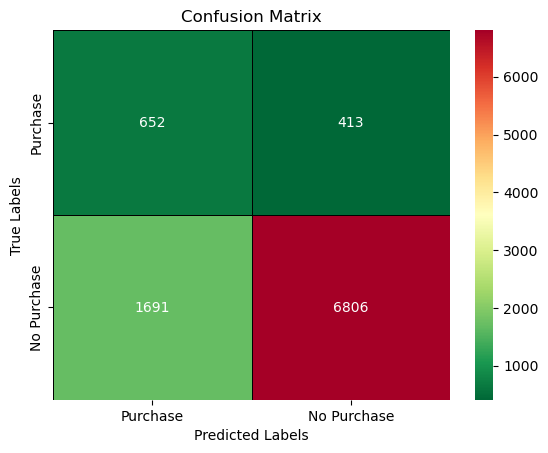

In [98]:
cm_bank_model2 = confusion_matrix(y_test2, y_prediction2)

class_names = ['No Purchase','Purchase']
sns.heatmap(cm_bank_model2, annot = True, fmt='d', cmap = 'RdYlGn_r', xticklabels = class_names, yticklabels = class_names, linewidths = 0.5, linecolor = 'black')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In the new model, significantly lower numbers were displayed for TN at 6806, leading to a drop in Accuracy values. <br>

Whereas FN reduced in numbers to 413 and TP increased in numbers to 652, leading to a higher Recall value.

### 6. Hyperparameter Tuning of KNN Classifier

In [99]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [100]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X2, y, random_state = 99, stratify = y) 

In [101]:
X_train3 = scaler.fit_transform(X_train3) 
X_test3 = scaler.transform(X_test3)

In [102]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 79,
 'p': 2,
 'weights': 'uniform'}

In [103]:
# tuning by gridsearchCV
grid_params = {'metric': ['euclidean','manhattan', 'chebyshev'],
               'n_neighbors': list(range(20, 75)),
               'weights': ['uniform','distance']}

In [104]:
grid_search = GridSearchCV(knn, grid_params, cv = 3, scoring = 'recall', n_jobs = -1)

In [118]:
grid_search.fit(X_train3, y_train3)

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

Best Hyperparameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 99}
Best Score: 0.6771023803640558


The KNN classifier is tuned to produce the best recall score using GridSearchCV.

In [119]:
y_prediction3 = grid_search.best_estimator_.predict(X_test3)
report3R = metrics.classification_report(y_test3, y_prediction3, output_dict = True)

report3R_df = pd.DataFrame(report3R).round(3)
report3R_df = report3R_df.drop(['False', 'accuracy', 'macro avg', 'weighted avg'], axis = 1)
report3R_df = report3R_df.drop('support')
report3R_df.loc['accuracy'] = [round((metrics.accuracy_score(y_test3, y_prediction3)), 3)]
report3R_df = report3R_df.rename(columns = {'True' : 'KNN_R'})
report3R_df

,KNN_R
precision,0.250
recall,0.692
f1-score,0.367
accuracy,0.735


In [120]:
grid_search = GridSearchCV(knn, grid_params, cv = 3, scoring = 'accuracy', n_jobs = -1)

In [121]:
grid_search.fit(X_train3, y_train3)

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 43, 'weights': 'uniform'}
Best Score: 0.9003939615800299


The KNN classifier is tuned to produce the best accuracy score using GridSearchCV.

In [122]:
y_prediction3 = grid_search.best_estimator_.predict(X_test3)
report3A = metrics.classification_report(y_test3, y_prediction3, output_dict = True)

report3A_df = pd.DataFrame(report3A).round(3)
report3A_df = report3A_df.drop(['False', 'accuracy', 'macro avg', 'weighted avg'], axis = 1)
report3A_df = report3A_df.drop('support')
report3A_df.loc['accuracy'] = [round((metrics.accuracy_score(y_test3, y_prediction3)), 3)]
report3A_df = report3A_df.rename(columns = {'True' : 'KNN_A'})
report3A_df

,KNN_A
precision,0.630
recall,0.241
f1-score,0.349
accuracy,0.900


Hyperparameter tuning did not change accuracy or the other metrics by much for the KNN Classifier.

### 7. Training and Hyperparameter Tuning of Decision Tree Classifier

In [123]:
from sklearn.tree import DecisionTreeClassifier

In [124]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X2, y, random_state = 99, stratify = y) 

In [125]:
dtreeclf = DecisionTreeClassifier(random_state = 99)
dtreeclf.get_params() # default model parameters

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 99,
 'splitter': 'best'}

In [126]:
# tuning by gridsearchCV
grid_params2 = {'criterion': ['gini', 'entropy'], 
                'max_depth': [None] + list(range(5, 15)), 
                'min_samples_split': list(range(2, 20)), 
                'min_samples_leaf': list(range(1, 10)), 
                'max_features': [None, 'sqrt', 'log2'],
                'class_weight': ['balanced'],
                'random_state' : [99]} 

In [127]:
grid_search = GridSearchCV(dtreeclf, grid_params2, cv = 3, scoring = 'recall', n_jobs = -1)

In [128]:
grid_search.fit(X_train4, y_train4)

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

Best Hyperparameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 99}
Best Score: 0.6771023803640558


The decision tree classifier is tuned to produce the best recall score using GridSearchCV.

In [129]:
y_prediction4 = grid_search.best_estimator_.predict(X_test4)
report4R = metrics.classification_report(y_test4, y_prediction4, output_dict = True)

report4R_df = pd.DataFrame(report4R).round(3)
report4R_df = report4R_df.drop(['False', 'accuracy', 'macro avg', 'weighted avg'], axis = 1)
report4R_df = report4R_df.drop('support')
report4R_df.loc['accuracy'] = [round((metrics.accuracy_score(y_test4, y_prediction4)), 3)]
report4R_df = report4R_df.rename(columns = {'True' : 'dTree_R'})
report4R_df

,dTree_R
precision,0.250
recall,0.692
f1-score,0.367
accuracy,0.735


In [130]:
# tuning by gridsearchCV
grid_params2 = {'criterion': ['gini', 'entropy'], 
                'max_depth': [None] + list(range(5, 15)), 
                'min_samples_split': list(range(2, 20)), 
                'min_samples_leaf': list(range(1, 10)), 
                'max_features': [None, 'sqrt', 'log2'],
                'class_weight': [None],
                'random_state' : [99]} 

In [131]:
grid_search = GridSearchCV(dtreeclf, grid_params2, cv = 3, scoring = 'accuracy', n_jobs = -1)

In [132]:
grid_search.fit(X_train4, y_train4)

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

Best Hyperparameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 18, 'random_state': 99}
Best Score: 0.9021720182686609


The decision tree classifier is tuned to produce the best accuracy score using GridSearchCV.

In [133]:
y_prediction4 = grid_search.best_estimator_.predict(X_test4)
report4A = metrics.classification_report(y_test4, y_prediction4, output_dict = True)

report4A_df = pd.DataFrame(report4A).round(3)
report4A_df = report4A_df.drop(['False', 'accuracy', 'macro avg', 'weighted avg'], axis = 1)
report4A_df = report4A_df.drop('support')
report4A_df.loc['accuracy'] = [round((metrics.accuracy_score(y_test4, y_prediction4)), 3)]
report4A_df = report4A_df.rename(columns = {'True' : 'dTree_A'})
report4A_df

,dTree_A
precision,0.656
recall,0.231
f1-score,0.342
accuracy,0.901


For decicion tree models, when class weight is set to 'balanced', class imbalance in dataset is accounted for and a much higher Recall value is obtained at 0.692 when parameters are optimized for Recall. <br>

However, both Accuracy and Precision values will be lowered. When class weight is set to None and optimized for Accuracy, Accuracy is much higher at 0.901 but Recall is much lower. <br>

No additional oversampling technique needs to be applied to dataset and model training time is also much faster.

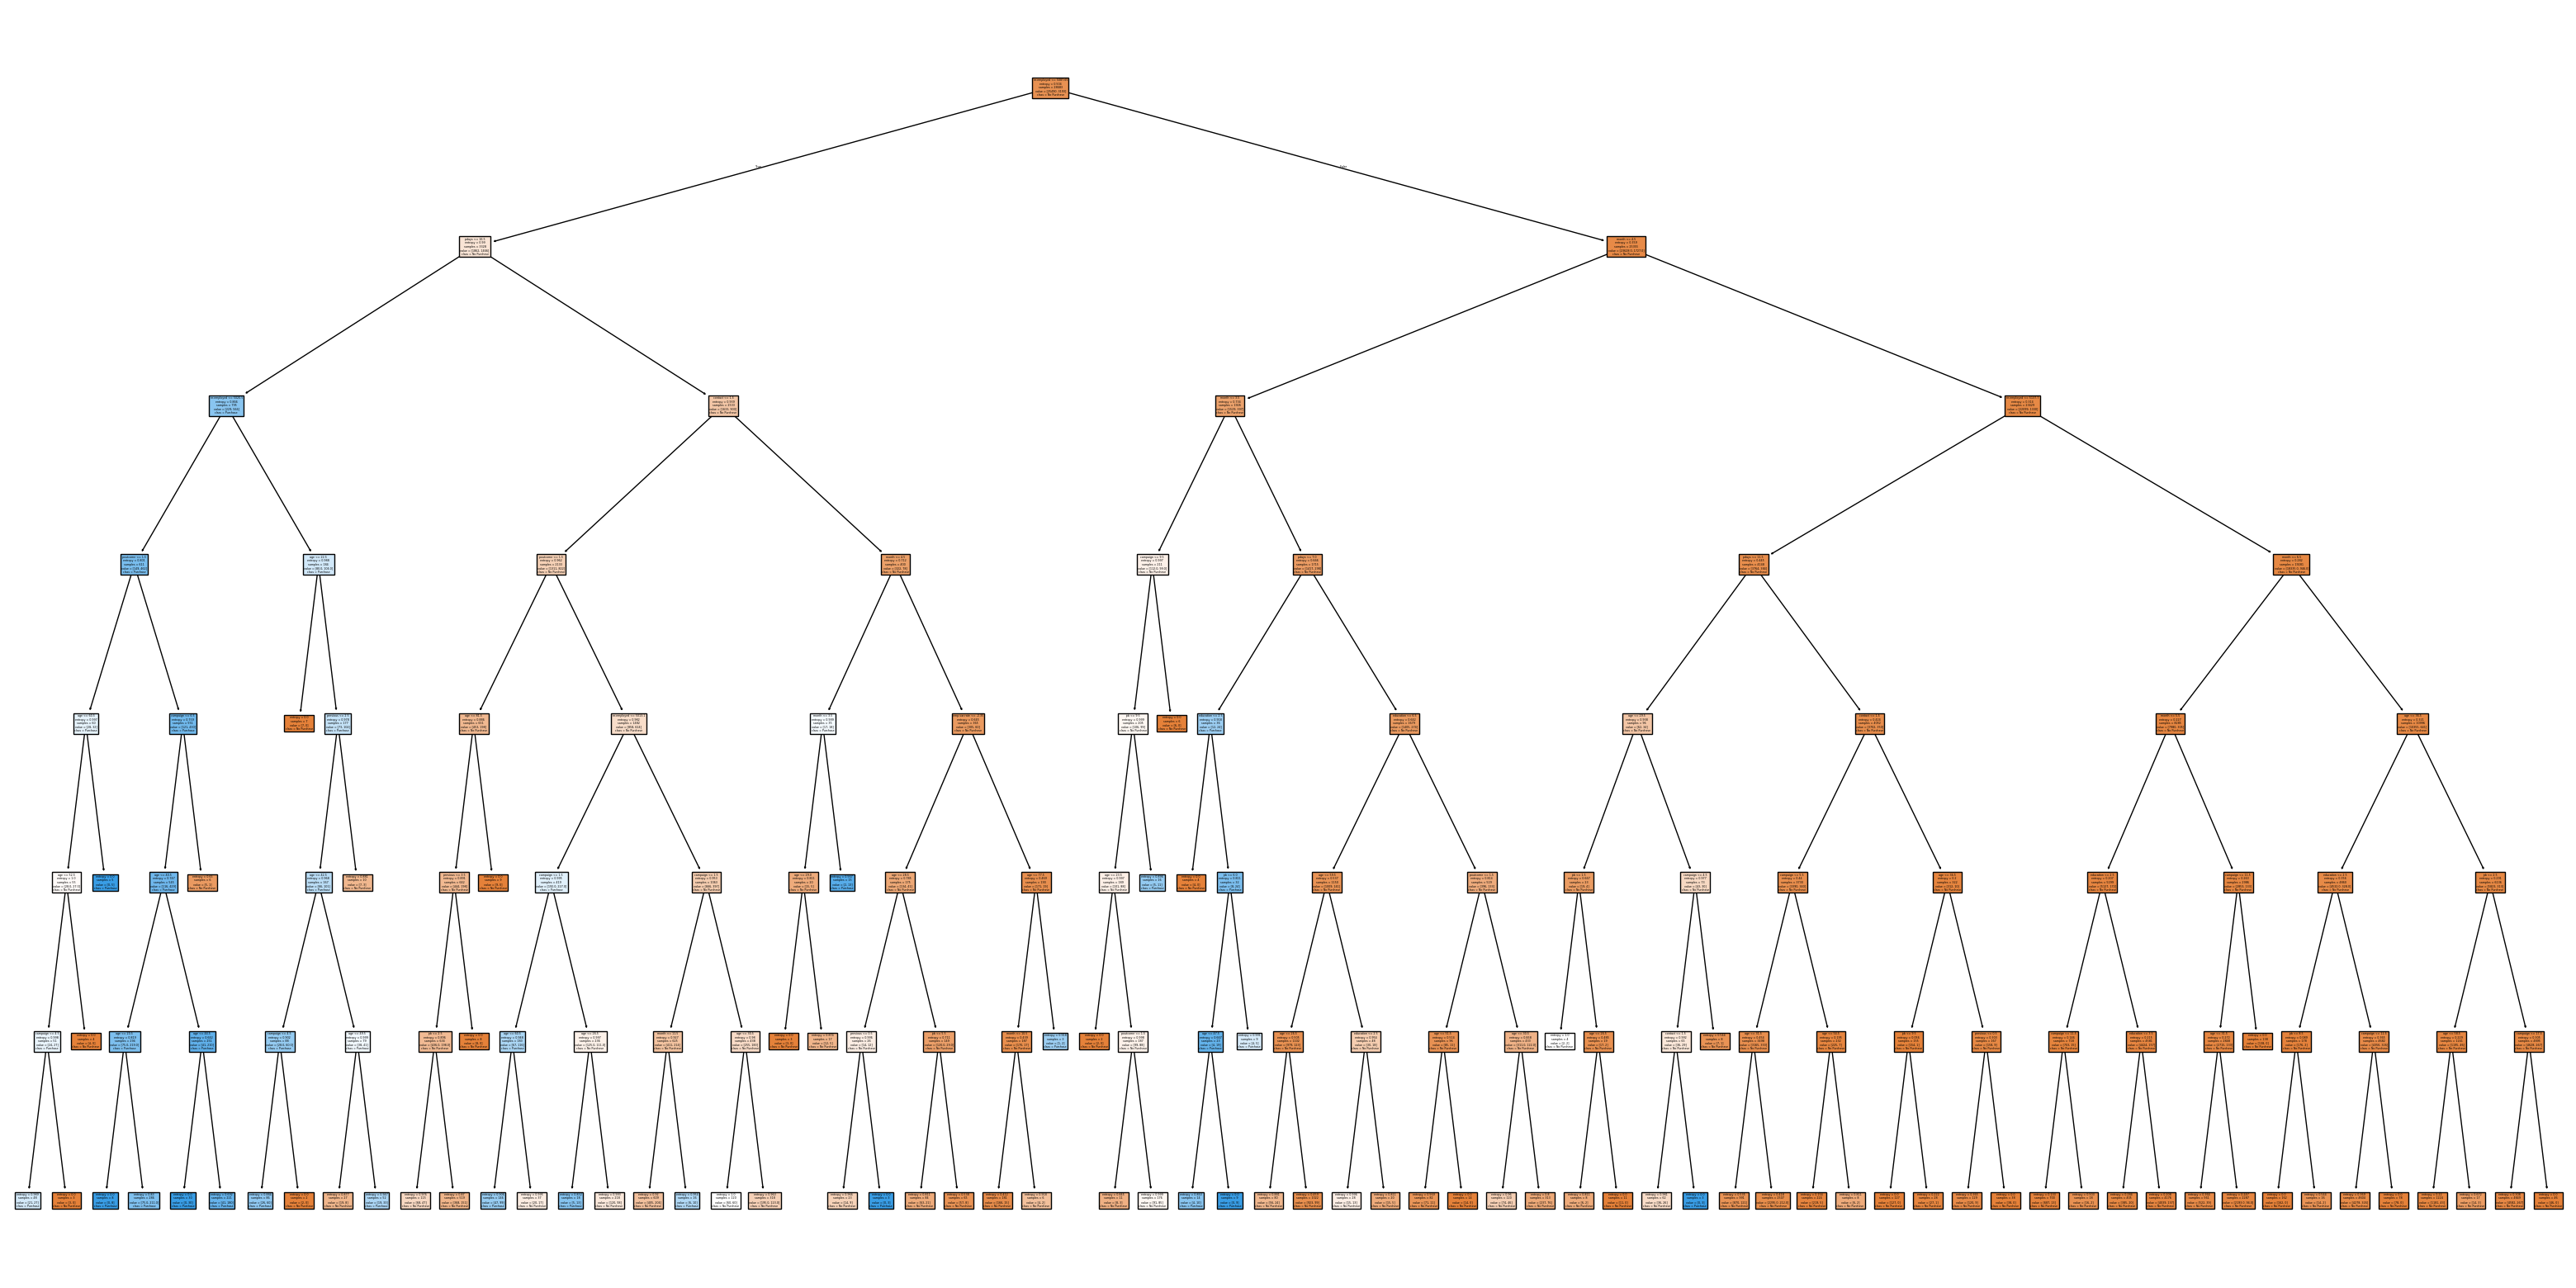

Number of nodes: 165
Number of leaves: 83
Number of decision: 82


In [138]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the decision tree
fig10 = plt.figure(figsize = (40, 20)) 
plot_tree(grid_search.best_estimator_, filled = True, feature_names = X_train4.columns.tolist(), class_names = ['No Purchase', "Purchase"])
plt.show()

num_nodes = grid_search.best_estimator_.tree_.node_count
num_leaves = grid_search.best_estimator_.tree_.n_leaves
num_decision = num_nodes - num_leaves

print("Number of nodes:", num_nodes)
print("Number of leaves:", num_leaves)
print("Number of decision:", num_decision)

# fig10.savefig("tree_plot.png", dpi = 300)

### 8. Training and Hyperparameter Tuning of Random Forest Classifier

In [139]:
from sklearn.ensemble import RandomForestClassifier

In [140]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X2, y, random_state = 99, stratify = y) 

In [141]:
rforestclf = RandomForestClassifier(random_state = 99)
rforestclf.get_params() # default model parameters

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 99,
 'verbose': 0,
 'warm_start': False}

In [153]:
# tuning by gridsearchCV
grid_params3 = {'n_estimators': [100],
                'criterion': ['gini', 'entropy'], 
                'max_depth': [None] + list(range(5, 10)), 
                'min_samples_split': list(range(2, 20)),
                'min_samples_leaf': list(range(1, 5)), 
                'max_features': ['sqrt', 'log2'],
                'class_weight': ['balanced'],
                'random_state' : [99]} 

In [154]:
grid_search = GridSearchCV(rforestclf, grid_params3, cv = 3, scoring = 'recall', n_jobs = -1)

In [155]:
grid_search.fit(X_train5, y_train5) # longer processing time than dtree models

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

Best Hyperparameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 100, 'random_state': 99}
Best Score: 0.6436104933695742


The random forest classifier was tuned to produce the best recall score using GridSearchCV.

In [156]:
y_prediction5 = grid_search.best_estimator_.predict(X_test5) 
report5R = metrics.classification_report(y_test5, y_prediction5, output_dict = True)

report5R_df = pd.DataFrame(report5R).round(3)
report5R_df = report5R_df.drop(['False', 'accuracy', 'macro avg', 'weighted avg'], axis = 1)
report5R_df = report5R_df.drop('support')
report5R_df.loc['accuracy'] = [round((metrics.accuracy_score(y_test5, y_prediction5)), 3)]
report5R_df = report5R_df.rename(columns = {'True' : 'rForest_R'})
report5R_df

,rForest_R
precision,0.332
recall,0.644
f1-score,0.438
accuracy,0.816


In [146]:
grid_params3 = {'n_estimators': [100],
                'criterion': ['gini', 'entropy'], 
                'max_depth': [None] + list(range(5, 10)), 
                'min_samples_split': list(range(2, 20)),
                'min_samples_leaf': list(range(1, 5)), 
                'max_features': ['sqrt', 'log2'],
                'class_weight': [None],
                'random_state' : [99]} 

In [147]:
grid_search = GridSearchCV(rforestclf, grid_params3, cv = 3, scoring = 'accuracy', n_jobs = -1)

In [148]:
grid_search.fit(X_train5, y_train5)

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

Best Hyperparameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 14, 'n_estimators': 100, 'random_state': 99}
Best Score: 0.9013004218526653


The random forest classifier was tuned to produce the best accuracy score using GridSearchCV.

In [151]:
y_prediction5 = grid_search.best_estimator_.predict(X_test5) 
report5A = metrics.classification_report(y_test5, y_prediction5, output_dict = True)

report5A_df = pd.DataFrame(report5A).round(3)
report5A_df = report5A_df.drop(['False', 'accuracy', 'macro avg', 'weighted avg'], axis = 1)
report5A_df = report5A_df.drop('support')
report5A_df.loc['accuracy'] = [round((metrics.accuracy_score(y_test5, y_prediction5)), 3)]
report5A_df = report5A_df.rename(columns = {'True' : 'rForest_R'})
report5A_df

,rForest_R
precision,0.654
recall,0.238
f1-score,0.348
accuracy,0.901


In [157]:
final_reportA_df = pd.concat([report3A_df, report4A_df, report5A_df], axis = 1)
final_reportA_df

,KNN_A,dTree_A,rForest_R
precision,0.630,0.656,0.654
recall,0.241,0.231,0.238
f1-score,0.349,0.342,0.348
accuracy,0.900,0.901,0.901


In [158]:
final_reportR_df = pd.concat([report3R_df, report4R_df, report5R_df], axis = 1)
final_reportR_df

,KNN_R,dTree_R,rForest_R
precision,0.250,0.250,0.332
recall,0.692,0.692,0.644
f1-score,0.367,0.367,0.438
accuracy,0.735,0.735,0.816


### 9. Conclusion

i) Comparing all 3 models, KNN, decision tree, and random forests, the model with the highest Recall is the decision tree model, largely due to the balanced class weight parameter incorporated into the model fitting. This model also runs alot faster than the other 2 models. <br>

ii) With a higher Recall value, the decision tree classifier promises to be a more effective tool for predicting customers who are potential buyers, which will generate more revenue for the bank.

iii) The decision tree model also has the highest accuracy and precision values when tuned for highest accuracy.

iv) With a higher Accuracy and Precision value, the model is more useful for predicting customers who are not going to buy, and might help the bank steer their marketing campaign and customer service officers towards customer segments who might be more receptive to their efforts.